<a href="https://colab.research.google.com/github/sanjeevrs2000/CS6910-Assignment-2/blob/main/Assignment_2A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#!pip install wandb

In [13]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import cv2
#import wandb

In [2]:
%%capture
!curl -SL https://storage.googleapis.com/wandb_datasets/nature_12K.zip > nature_12K.zip
!unzip nature_12K.zip

train_dir='inaturalist_12K/train/'
test_dir='inaturalist_12K/val/'
categories=['Amphibia','Animalia','Arachnida','Aves','Fungi','Insecta','Mammalia','Mollusca','Plantae','Reptilia']

In [97]:
model=models.Sequential()

model.add(Conv2D(32, (3, 3),input_shape=(300,300,3),activation='relu'))    
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64)) #change dense layer size
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

In [98]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_113 (Conv2D)          (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_113 (MaxPoolin (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 33, 33, 32)      

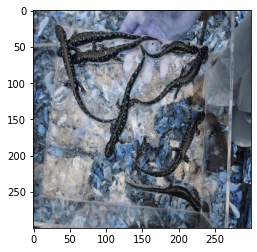

In [6]:
#visualizing an image 
train_set=[]
for category in categories:
  dir=os.path.join(train_dir,category)
  for img in os.listdir(dir):
    train_set.append(img) 
    imgs=cv2.imread(os.path.join(dir,img))
    new_img=cv2.resize(imgs,(300,300))
    plt.imshow(new_img,cmap='gray')
    break
  break

In [99]:
img_height=300
img_width=300

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.1,
    dtype=tf.float32,
)

train_set = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode="rgb",
    class_mode="sparse",
    shuffle=True,
    subset="training",
    seed=123,
)

val_set = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    class_mode="sparse",
    shuffle=True,
    subset="validation",
    seed=123,
)


Found 9000 images belonging to 10 classes.
Found 999 images belonging to 10 classes.


In [100]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=[tf.keras.losses.SparseCategoricalCrossentropy()],
    metrics=['accuracy'],
)


model.fit(train_set,epochs=10,validation_data=val_set)

Epoch 1/10
282/282 [==============================] - 117s 409ms/step - loss: 2.2604 - accuracy: 0.1474 - val_loss: 2.1738 - val_accuracy: 0.1972
Epoch 2/10
282/282 [==============================] - 115s 407ms/step - loss: 2.1534 - accuracy: 0.2142 - val_loss: 2.0782 - val_accuracy: 0.2462
Epoch 3/10
282/282 [==============================] - 115s 407ms/step - loss: 2.0453 - accuracy: 0.2730 - val_loss: 2.0375 - val_accuracy: 0.2783
Epoch 4/10
282/282 [==============================] - 114s 405ms/step - loss: 1.9704 - accuracy: 0.2997 - val_loss: 2.0034 - val_accuracy: 0.2973
Epoch 5/10
282/282 [==============================] - 115s 407ms/step - loss: 1.8614 - accuracy: 0.3396 - val_loss: 2.0356 - val_accuracy: 0.2903
Epoch 6/10
282/282 [==============================] - 115s 407ms/step - loss: 1.8219 - accuracy: 0.3563 - val_loss: 1.9774 - val_accuracy: 0.2813
Epoch 7/10
282/282 [==============================] - 114s 406ms/step - loss: 1.7732 - accuracy: 0.3700 - val_loss: 1.9897 -